# Non-Gourmet Artificial Neural Network

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Theo's pre-processed image data

In [3]:
theoPreprocessedPath = '/Users/anthony/Documents/Comp551_KaggleData/theo_preprocessed/processedData.npy'
theo_rawImgMats = np.load(theoPreprocessedPath)

In [4]:
theoProcessed_ImgSet = np.empty((len(theo_rawImgMats),40,40))

for idx in range(len(theo_rawImgMats)):
    theoProcessed_ImgSet[idx,:,:] = theo_rawImgMats[idx].reshape((40,40))
    
print(np.shape(theoProcessed_ImgSet))

(10000, 40, 40)


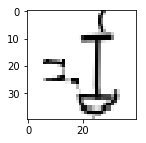

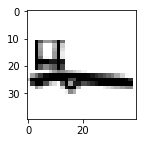

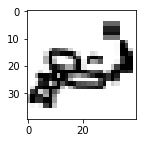

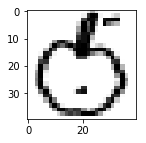

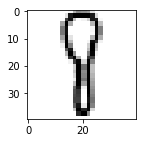

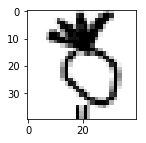

In [5]:
for idx in range(len(theoProcessed_ImgSet)):
    if idx > 5:
        break
    
    # SHow image
    plt.figure(figsize=(2,2))
    plt.imshow(theoProcessed_ImgSet[idx], cmap='gray_r')
    plt.show()

### Flatten images

In [9]:
# Array to store this
X_unscaled = np.empty((np.shape(theoProcessed_ImgSet)[0],
                       np.shape(theoProcessed_ImgSet)[1] * np.shape(theoProcessed_ImgSet)[2]))

# Flatten images
for i, imgMat in enumerate(theoProcessed_ImgSet):
    X_unscaled[i, :] = imgMat.flatten()

np.shape(X_unscaled)

(10000, 1600)

## Clean-up for model

### Get labels

In [15]:
TRAIN_LAB_PATH = "/Users/anthony/Documents/Comp551_KaggleData/train_labels.csv"

lab_df = pd.read_csv(TRAIN_LAB_PATH)
print(len(lab_df))
lab_df[0:3]

10000


,Id,Category
0,0,shovel
1,1,rifle
2,2,scorpion


In [17]:
# Get labels and encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Get data
string_labels = lab_df['Category'].values
# Integer encode
le = LabelEncoder()
y_intLab = le.fit_transform(string_labels)
# One hot encode
encoder_OH = OneHotEncoder(sparse=False)
y_intLab = y_intLab.reshape(len(y_intLab), 1)
y_preShuf = encoder_OH.fit_transform(y_intLab)

### Scale 

In [24]:
# SCale
X_preShuf = X_unscaled / np.max(X_unscaled)
print(np.shape(X_preShuf))

(10000, 1600)


### Shuffle data and split

In [27]:
# Shuffle
from sklearn.utils import shuffle
X, y = shuffle(X_preShuf, y_preShuf, random_state=42)

print(np.shape(X))
print(np.shape(y))

(10000, 1600)
(10000, 31)


In [29]:
# Split into sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size=0.20, random_state=42)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(8000, 1600)
(2000, 1600)
(8000, 31)
(2000, 31)


## Importing home-made ANN 

In [32]:
import homecooked_NN as hHH

model = hHH.sequential_model(alpha=0.01)

model.input_layer(1600)
model.add_hidden(800, activation='relu')
model.add_hidden(200, activation='relu')
model.output_layer(31, activation='softmax')

model.summarize()


Index 0:	(1601, 1) --- (1601, 800) --->
Index 1:	(801, 1) --- (801, 200) --->
Index 2:	(201, 1) --- (201, 31) --->
Output layer: 	(31, 1)


In [33]:
EPOCHS = 2
trainingMetrics = model.train(X_train, y_train,
                              epochs=EPOCHS,
                              validation=(X_test, y_test)
                             )

KeyboardInterrupt: 